In [1]:
from keras.datasets.cifar10 import load_data
# ((訓練圖片, 訓練圖片答案), (測試圖片, 側視圖片答案))
((x_train, y_train), (x_test, y_test)) = load_data()

Using TensorFlow backend.


In [2]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (50000, 32, 32, 3)
測試資料維度: (10000, 32, 32, 3)


In [3]:
trans = {0:"飛機", 1:"汽車", 2:"鳥",
         3:"貓", 4:"鹿", 5:"狗",
         6:"青蛙", 7:"馬", 8:"船", 
         9:"卡車"}

正確答案: 鹿


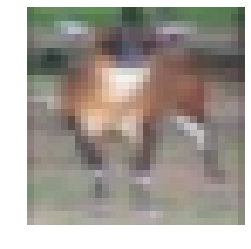

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("正確答案:", trans[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3),
              padding="same",
              activation="relu",
              input_shape=(32, 32, 3)))
# 3 * 3 * 3 (一個過濾器的權重) * 32 + 32 ( bias, 32個過濾器 ) = 896
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3),
              padding="same",
              activation="relu"))
# 3 * 3 * 32 (一個過濾器的權重) * 32 + 64 ( bias, 64個過濾器 ) = 18496
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())

cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [6]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [7]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [8]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Demo:", y_train_cat[0])

Demo: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
cnn.fit(x_train_norm,
         y_train_cat,
         batch_size=200,
         epochs=10,
         validation_split=0.1,
         verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 74s - loss: 1.5236 - acc: 0.4592 - val_loss: 1.2482 - val_acc: 0.5618
Epoch 2/10
 - 82s - loss: 1.1583 - acc: 0.5939 - val_loss: 1.0921 - val_acc: 0.6208
Epoch 3/10
 - 98s - loss: 1.0142 - acc: 0.6482 - val_loss: 1.0276 - val_acc: 0.6426
Epoch 4/10
 - 112s - loss: 0.9308 - acc: 0.6785 - val_loss: 0.9365 - val_acc: 0.6740
Epoch 5/10
 - 80s - loss: 0.8558 - acc: 0.7027 - val_loss: 0.8992 - val_acc: 0.6960
Epoch 6/10
 - 77s - loss: 0.7858 - acc: 0.7288 - val_loss: 0.8909 - val_acc: 0.6970
Epoch 7/10
 - 77s - loss: 0.7326 - acc: 0.7457 - val_loss: 0.8766 - val_acc: 0.7008
Epoch 8/10
 - 78s - loss: 0.6744 - acc: 0.7677 - val_loss: 0.8412 - val_acc: 0.7142
Epoch 9/10
 - 77s - loss: 0.6139 - acc: 0.7889 - val_loss: 0.8435 - val_acc: 0.7170
Epoch 10/10
 - 77s - loss: 0.5651 - acc: 0.8061 - val_loss: 0.9200 - val_acc: 0.7082


In [10]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 7s 692us/step


[0.9469001298904419, 0.6912]

In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,646,31,42,6,39,4,42,8,108,74
1,8,827,7,0,1,2,16,3,24,112
2,57,9,523,12,103,66,156,35,18,21
3,15,24,76,291,90,195,217,33,22,37
4,16,4,68,13,654,33,137,52,15,8
5,15,5,50,54,52,649,111,38,13,13
6,2,6,23,8,18,12,918,3,5,5
7,12,6,24,8,84,56,32,752,4,22
8,34,49,8,2,6,5,20,6,820,50
9,12,83,9,5,5,3,20,10,21,832


預測錯誤個數: 3088


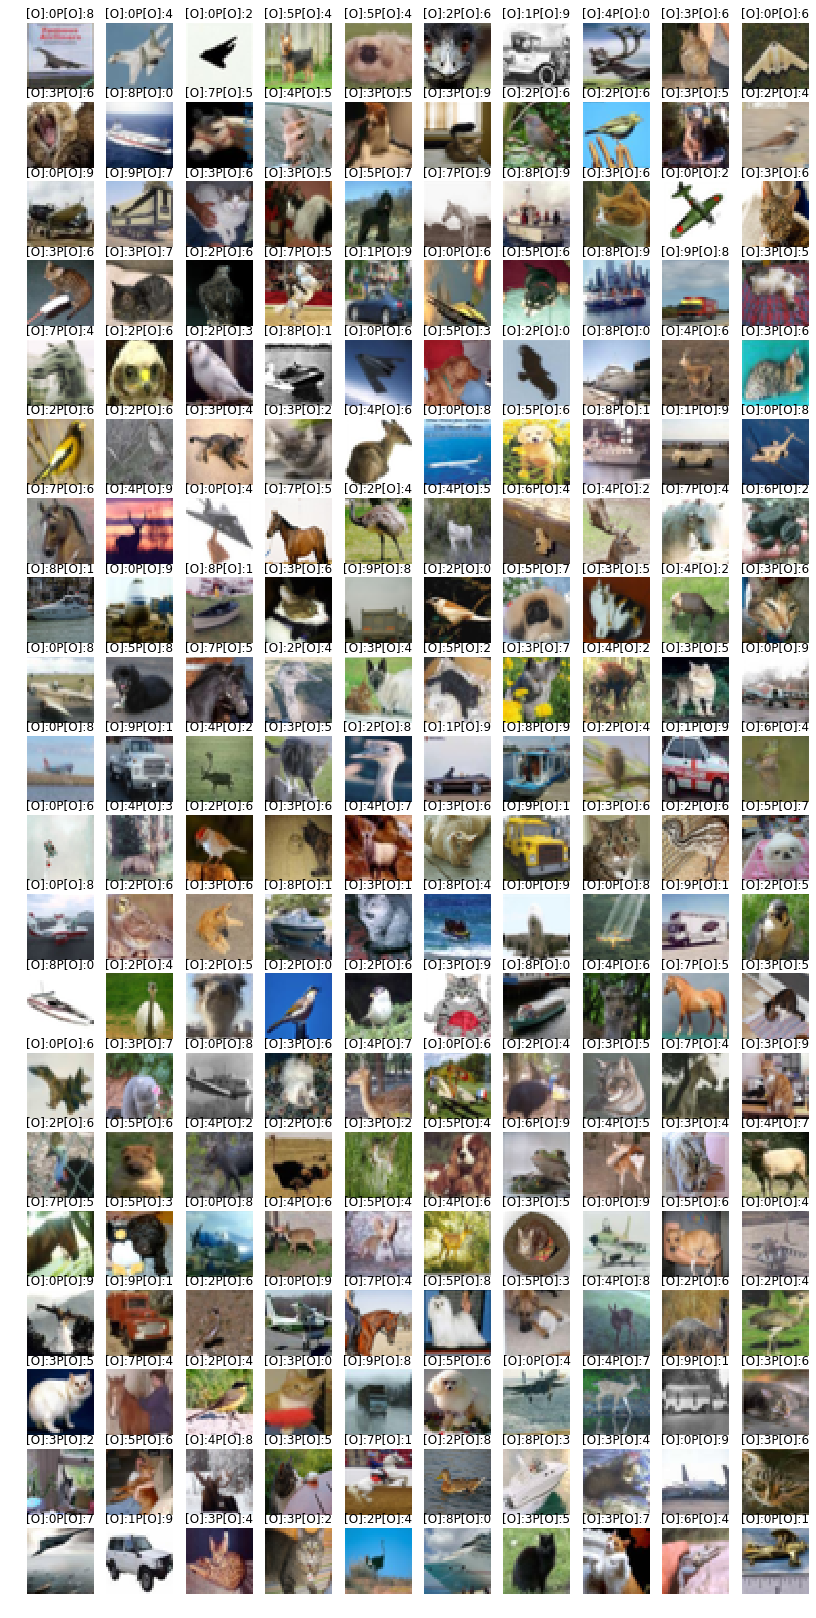

In [12]:
import numpy as np
false_index = np.nonzero(pre != y_test.reshape(10000))[0]
print("預測錯誤個數:", len(false_index))
false_img = x_test[false_index]
ori_label = y_test[false_index]
pre_label = pre[false_index]

width = 10;
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 450))
for (index, img) in enumerate(false_img[:200]):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index][0]) + "P[O]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)